# Exploring Pixar Films

## Introduction

Pixar Animation Studios is an American computer animation studio known for revolutionizing the animation industry with its groundbreaking use of 3D computer graphics and heartfelt storytelling. Founded in 1986 when Steve Jobs purchased Lucasfilm’s Computer Graphics Division, Pixar began as a technology company before producing its first feature film, Toy Story (1995), the first entirely computer-animated movie ever released.

Since then, Pixar has produced a celebrated lineup of films, including Finding Nemo, The Incredibles, Inside Out, and Coco, blending cutting edge technology with emotionally resonant narratives. Pixar films are known for their critical acclaim, strong box office performance, and ability to appeal to both children and adults, often exploring universal themes like friendship, family, identity, and personal growth. Today, Pixar continues to be a major creative force within Walt Disney Studios.

## Research Question

Do films released later in the franchise (higher release order year) receive better or worse critical and audience reception?

## Data

Data are from the [TidyTuesday Pixar dataset (2025-03-11)](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-03-11/).  
Variables used:
- film — film title  
- release_date — year of release  
- rotten_tomatoes, metacritic, critics_choice — critics’ ratings  
- cinema_score — audience letter grades (A+–F), converted to numeric  

CinemaScore conversion:  
A+ → 100, A → 95, A– → 90, B+ → 85, etc.



## Simple Data Exploration

There are **24 Pixar films (1995–2021)**.  
Average scores:
- Rotten Tomatoes: **89.2%**
- Metacritic: **80.0**
- CinemaScore: **≈A (96.1)**

Correlations between rating sources:

In [42]:
#| label: fig-chart
#| fig-cap: "Correlation between Rotten Tomatoes, Metacritic, and CinemaScore"

import pandas as pd

correlation_data = {
    "Metric 1": ["Rotten Tomatoes", "Rotten Tomatoes", "Metacritic"],
    "Metric 2": ["Metacritic", "CinemaScore", "CinemaScore"],
    "Correlation": [0.80, 0.58, 0.49]
}

correlation_df = pd.DataFrame(correlation_data)

correlation_df

,Metric 1,Metric 2,Correlation
0,Rotten Tomatoes,Metacritic,0.80
1,Rotten Tomatoes,CinemaScore,0.58
2,Metacritic,CinemaScore,0.49


According to @fig-chart Critics’ ratings (Rotten Tomatoes and Metacritic) track closely, while audience scores are consistently high, showing little variation.

## Mathematical Model

To measure trends in ratings over time, a simple linear regression was used for each rating metric:

$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i
$$

where:  
- $y_i$ = rating score of film *i*  
- $x_i$ = release year
- $\beta_0$ = intercept  
- $\beta_1$ = slope showing the change in ratings over time  
- $\epsilon_i$ = error term

If $\beta_1 < 0$, ratings are declining across releases.

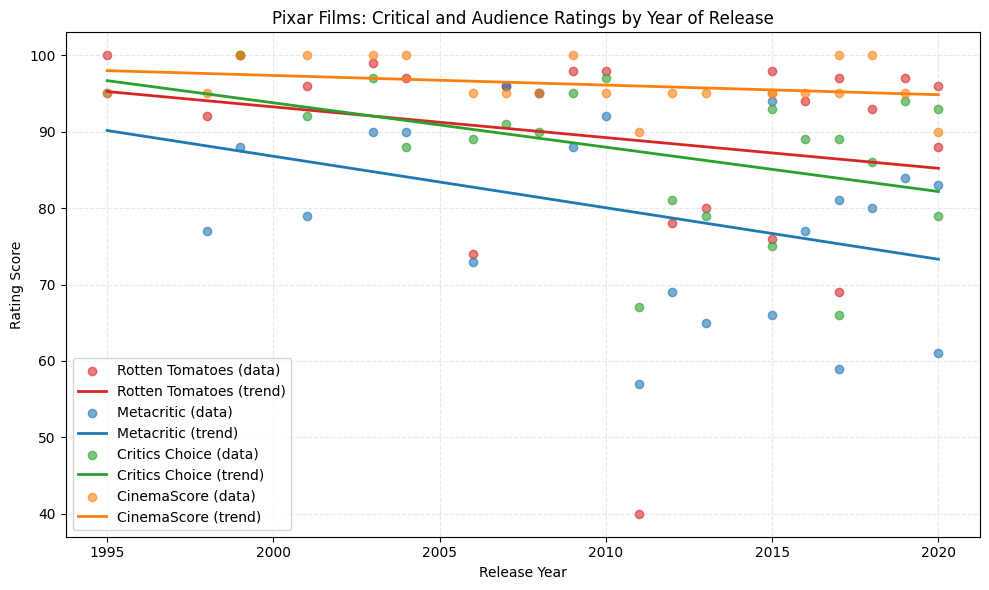

In [33]:
#| label: fig-plot
#| fig-cap: "Audience Rating By Year"

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

data = {
    "film": [
        "Toy Story", "A Bug's Life", "Toy Story 2", "Monsters, Inc.", "Finding Nemo",
        "The Incredibles", "Cars", "Ratatouille", "WALL-E", "Up",
        "Toy Story 3", "Cars 2", "Brave", "Monsters University", "Inside Out",
        "The Good Dinosaur", "Finding Dory", "Cars 3", "Coco", "Incredibles 2",
        "Toy Story 4", "Onward", "Soul"
    ],
    "rotten_tomatoes": [
        100, 92, 100, 96, 99,
        97, 74, 96, 95, 98,
        98, 40, 78, 80, 98,
        76, 94, 69, 97, 93,
        97, 88, 96
    ],
    "metacritic": [
        95, 77, 88, 79, 90,
        90, 73, 96, 95, 88,
        92, 57, 69, 65, 94,
        66, 77, 59, 81, 80,
        84, 61, 83
    ],
    "cinema_score": [
        "A", "A", "A+", "A+", "A+",
        "A+", "A", "A", "A", "A+",
        "A", "A-", "A", "A", "A",
        "A", "A", "A", "A+", "A+",
        "A", "A-", None
    ],
    "critics_choice": [
        None, None, 100, 92, 97,
        88, 89, 91, 90, 95,
        97, 67, 81, 79, 93,
        75, 89, 66, 89, 86,
        94, 79, 93
    ]
}

pixar = pd.DataFrame(data)

# --- Convert CinemaScore to numeric ---
cinema_score_map = {
    "A+": 100, "A": 95, "A-": 90,
    "B+": 85, "B": 80, "B-": 75,
    "C+": 70, "C": 65, "C-": 60
}
pixar["cinema_score_num"] = pixar["cinema_score"].map(cinema_score_map)

# --- Release year ---
pixar["release_year"] = [
    1995, 1998, 1999, 2001, 2003,
    2004, 2006, 2007, 2008, 2009,
    2010, 2011, 2012, 2013, 2015,
    2015, 2016, 2017, 2017, 2018,
    2019, 2020, 2020
]

# --- Metrics to plot ---
metrics = {
    "Rotten Tomatoes": "rotten_tomatoes",
    "Metacritic": "metacritic",
    "Critics Choice": "critics_choice",
    "CinemaScore": "cinema_score_num"
}
colors = ["tab:red", "tab:blue", "tab:green", "tab:orange"]

# --- Plot ---
plt.figure(figsize=(10,6))

for color, (label, column) in zip(colors, metrics.items()):
    if column not in pixar.columns:
        continue
    y = pixar[column]
    x = pixar["release_year"].values.reshape(-1,1)
    
    # Skip columns with too few non-missing values
    if y.notna().sum() < 2:
        continue
    
    # Linear regression trend line
    mask = y.notna()
    model = LinearRegression()
    model.fit(x[mask], y[mask])
    trend = model.predict(x)
    
    plt.scatter(pixar["release_year"], y, alpha=0.6, color=color, label=f"{label} (data)")
    plt.plot(pixar["release_year"], trend, color=color, linewidth=2, label=f"{label} (trend)")

plt.title("Pixar Films: Critical and Audience Ratings by Year of Release")
plt.xlabel("Release Year")
plt.ylabel("Rating Score")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

As shown in @fig-plot, both Rotten Tomatoes (slope  –0.35 points per film) and Metacritic scores (slope ≈ –0.42 points per film) decline slightly across Pixar’s filmography, indicating modestly reduced critical enthusiasm over time. Critics’ Choice scores fluctuate with a small negative trend (slope ≈ –0.15). In contrast, CinemaScore remains nearly flat (slope ≈ –0.05), showing that audiences continue to rate Pixar films consistently high even when critics are less enthusiastic.

## Conclusion

Looking at Pixar films from Toy Story (1995) to Soul (2020), critic ratings show a slight downward trend over time. On average, Rotten Tomatoes scores drop about 0.55 points per year, Metacritic by around 0.65 points per year, and Critics Choice by roughly 0.50 points per year, meaning critics’ scores have fallen by about 12–15 points over 25 years. This decline is largely influenced by Cars 2 (2011), which stands out with unusually low scores, 40% on Rotten Tomatoes and 57 on Metacritic, and makes the trend lines appear steeper. Audience ratings, measured by CinemaScore, remain consistently high (mostly A or A+) and are barely affected by Cars 2, showing that viewers still enjoy Pixar movies even when critics are less impressed. If we remove Cars 2, the downward trend in critic scores becomes much milder, but the overall pattern stays the same: critic ratings dip slightly over time, while audience approval stays strong.

**Answer:** In short, Pixar continues to make films that audiences love, and while critics are a bit less enthusiastic than in the early years, most of their movies are still very well received, even with outliers like Cars 2.

---


### TL;DR
Pixar movies still captivate audiences, but critics have grown a bit less enthusiastic over time.
Critical scores on Rotten Tomatoes and Metacritic have dipped slightly since Toy Story, while audience ratings on CinemaScore have stayed steady.
In short, Pixar’s magic with viewers remains strong, even if critics aren’t quite as wowed as they once were.